In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util

# Testing Tree Path Covers

In [2]:
n = 20
tree = nx.random_labeled_tree(20)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

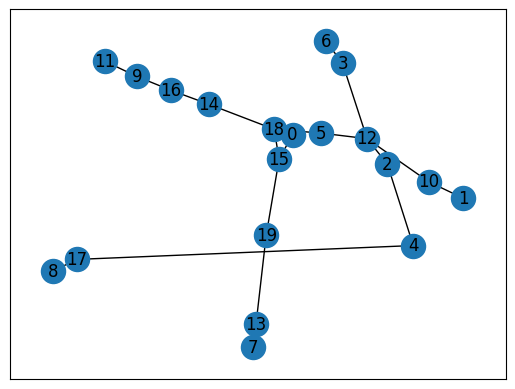

In [3]:
layout = nx.spring_layout(tree)
nx.draw_networkx(tree, pos=layout)

[(17, 8), (4, 17), (2, 4), (10, 1), (3, 6), (9, 11), (12, 2), (12, 10), (16, 9), (13, 7), (5, 12), (14, 16), (19, 13), (18, 5), (18, 14), (15, 18), (15, 19), (0, 15)]
Total path length: 8.518208430797422


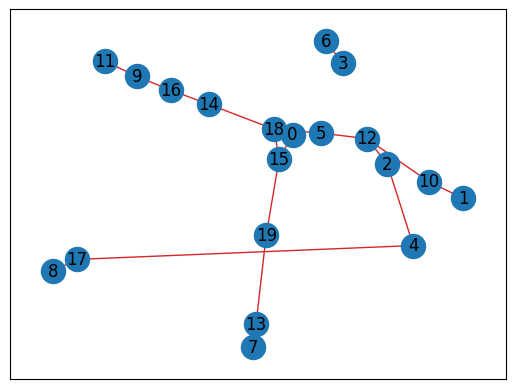

In [4]:
path = util.path_cover(tree)
nx.draw_networkx_nodes(tree, pos=layout)
nx.draw_networkx_labels(tree, pos=layout)
nx.draw_networkx_edges(tree, pos=layout, edgelist=path, edge_color="tab:red")
#nx.draw_networkx_edges(tree, pos=layout, edgelist=[x for x in tree.edges() if x not in path])